### Importing datasets

In [1]:
import pandas as pd
import numpy as np
import folium
import json

In [2]:
geo_madrid = r'MadridBarrios.json'
borough_dataM = pd.read_csv('Population_Madrid.csv')
borough_dataM.dtypes

Number                       int64
Neighborhood                object
Area(ha)                   float64
Population                   int64
Density (population/ha)    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [3]:
with open('BarcelonaBarrios.geojson') as file:
    geo_barcelona = json.load(file)
    
borough_dataB = pd.read_csv('Population_Barcelona.csv')
borough_dataB.dtypes

Number            int64
Neighborhood     object
Population        int64
Latitude        float64
Longitude       float64
Area            float64
Density         float64
dtype: object

### Geograpical coordinates of Madrid  & Barcelona

In [4]:
from geopy.geocoders import Nominatim 

In [5]:
address_B = 'Barcelona, Spain'

geolocator_B = Nominatim(user_agent="barcelona_agent")
location_B = geolocator_B.geocode(address_B)
latitude_B = location_B.latitude
longitude_B = location_B.longitude
print('The geograpical coordinates of Barcelona are {}, {}.'.format(latitude_B, longitude_B))

The geograpical coordinates of Barcelona are 41.3828939, 2.1774322.


In [6]:
address_M = 'Madrid, Spain'

geolocator_M = Nominatim(user_agent="madrid_agent")
location_M = geolocator_M.geocode(address_M)
latitude_M = location_M.latitude
longitude_M = location_M.longitude
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude_M, longitude_M))

The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


In [7]:
# Threshold for map legend

threshold_scaleM = np.linspace(borough_dataM['Population'].min(),
                              borough_dataM['Population'].max(),
                              6, dtype=int)
threshold_scaleM = threshold_scaleM.tolist()       # change the numpy array to a list
threshold_scaleM[-1] = threshold_scaleM[-1] + 1    # make sure that the last value of the list is greater 
                                                 # than the maximum immigration
    
threshold_scaleB = np.linspace(borough_dataB['Population'].min(),
                              borough_dataB['Population'].max(),
                              6, dtype=int)
threshold_scaleB = threshold_scaleB.tolist()       # change the numpy array to a list
threshold_scaleB[-1] = threshold_scaleB[-1] + 1    # make sure that the last value of the list is greater 
                                                 # than the maximum immigration
        

### Map of Madrid with neighborhoods

In [8]:
# Population per boroughs - Madrid 

madrid_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=10)
madrid_map.choropleth(
    geo_data=geo_madrid,
    data=borough_dataM,
    columns=['Number', 'Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='YlOrRd', 
    threshold_scale=threshold_scaleM,
    fill_opacity=0.9, 
    legend_name='Population in Madrid',
    reset=True,
    smooth_factor=0
)
madrid_map

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Map of Barcelona with neighborhoods

In [9]:
# Population per boroughs - Barcelona 

barcelona_map = folium.Map(location=[41.3828939, 2.1774322], zoom_start=11)
barcelona_map.choropleth(
    geo_data= geo_barcelona,
    data=borough_dataB,
    columns=['Number','Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='RdPu', 
    threshold_scale=threshold_scaleB,
    fill_opacity=0.9, 
    legend_name='Population in Barcelona',
    reset=True,
    smooth_factor=0
)
barcelona_map

### MADRID - Use Foursquare API to explore the neighborhoods and segment them

In [10]:
CLIENT_ID = '05M2JXCYWFFUP4EWFNRNA4ISQ4DN1QP32AYQPHYPNCEE3G0X'
CLIENT_SECRET = 'P5WGMHBRKTS0CM4T4WEKM4S5IYVMQDTU5CP1CFV4ZKKW3OEE'
VERSION = '20200605'
LIMIT = 100

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentials:
CLIENT_ID: 05M2JXCYWFFUP4EWFNRNA4ISQ4DN1QP32AYQPHYPNCEE3G0X
CLIENT_SECRET:P5WGMHBRKTS0CM4T4WEKM4S5IYVMQDTU5CP1CFV4ZKKW3OEE


In [11]:
import requests

### Analyze and explore the neighborhoods in Madrid

In [12]:
madrid_df = borough_dataM
madrid_df

,Number,Neighborhood,Area(ha),Population,Density (population/ha),Latitude,Longitude
0,1,Centro,522.82,140473,252.34,40.4177,-3.7079
1,2,Arganzuela,646.22,155660,235.16,40.3981,-3.6937
2,3,Retiro,546.62,120406,216.82,40.4082,-3.6774
3,4,Salamanca,539.24,147854,266.67,40.4315,-3.6747
4,5,Chamartin,917.55,147551,156.31,40.4608,-3.6775
5,6,Tetuan,537.47,161313,286.13,40.4608,-3.6995
6,7,Chamberi,467.92,140866,293.64,40.4362,-3.7038
7,8,Fuencarral-El Pardo,23783.84,249973,10.01,40.5563,-3.7786
8,9,Moncloa-Aravaca,4653.11,121683,25.12,40.4395,-3.7442
9,10,Latina,2542.72,242139,91.95,40.4035,-3.7362


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Venues in Madrid

In [14]:
madrid_venues = getNearbyVenues(names=madrid_df['Neighborhood'],
                                latitudes=madrid_df['Latitude'],
                                longitudes=madrid_df['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartin
Tetuan
Chamberi
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicalvaro
San Blas
Barajas


In [15]:
print(madrid_venues.shape)
madrid_venues.head()

(1350, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro,40.4177,-3.7079,Plaza de Isabel II,40.418114,-3.709397,Plaza
1,Centro,40.4177,-3.7079,Plaza Mayor,40.415527,-3.707506,Plaza
2,Centro,40.4177,-3.7079,Teatro Real de Madrid,40.418226,-3.711064,Opera House
3,Centro,40.4177,-3.7079,LUSH,40.419012,-3.704898,Cosmetics Shop
4,Centro,40.4177,-3.7079,Gran Meliá Palacio de los Duques *****,40.419835,-3.709494,Hotel


In [16]:
madrid_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=10)
madrid_map.choropleth(
    geo_data=geo_madrid,
    data=borough_dataM,
    columns=['Number', 'Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='YlOrRd', 
    threshold_scale=threshold_scaleM,
    fill_opacity=0.9, 
    legend_name='Population in Madrid',
    reset=True,
    smooth_factor=0
)

venues = folium.map.FeatureGroup()

for lat, lng, in zip(madrid_venues["Venue Latitude"],madrid_venues["Venue Longitude"]):
    venues.add_child(
        folium.Marker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6))
    
madrid_map.add_child(venues)
madrid_map

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [17]:
venues_countM1 = madrid_venues.groupby('Neighborhood').count()

In [18]:
venues_countM1.reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arganzuela,100,100,100,100,100,100
1,Barajas,65,65,65,65,65,65
2,Carabanchel,75,75,75,75,75,75
3,Centro,100,100,100,100,100,100
4,Chamartin,100,100,100,100,100,100
5,Chamberi,100,100,100,100,100,100
6,Ciudad Lineal,100,100,100,100,100,100
7,Hortaleza,65,65,65,65,65,65
8,Latina,96,96,96,96,96,96
9,Moncloa-Aravaca,14,14,14,14,14,14


In [19]:
venues_countM1.drop(["Neighborhood Longitude","Venue","Venue Latitude","Venue Longitude","Venue Category"], axis=1, inplace=True)
venues_countM1.rename(columns={"Neighborhood Latitude":"Total_venues"}, inplace=True)
venues_countM1.sort_values(by='Total_venues', ascending=True, inplace=True)

In [20]:
venues_countM1

,Total_venues
Neighborhood,
Vicalvaro,2
Villa de Vallecas,2
Moncloa-Aravaca,14
Villaverde,22
Moratalaz,35
San Blas,38
Puente de Vallecas,61
Hortaleza,65
Barajas,65


In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

ValueError: invalid literal for int() with base 10: 'Total_venues'

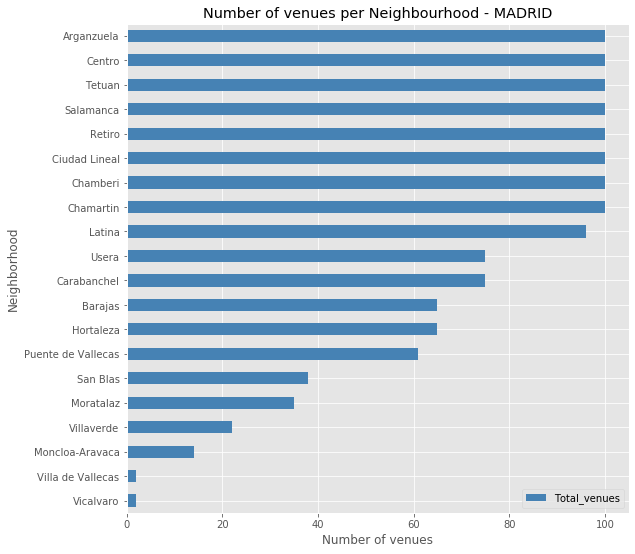

In [22]:
venues_countM1.plot(kind='barh', figsize=(9, 9), color='steelblue')
plt.xlabel('Number of venues')
plt.title('Number of venues per Neighbourhood - MADRID')

# annotate value labels to each country
for index, value in enumerate(venues_countM1): 
    label = format(int(value),",")
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy= value, color='white')

plt.savefig("Venues_countMADRID.jpg")
plt.show()


In [23]:
madrid_venues.groupby(['Neighborhood','Venue Category']).count()

Neighborhood Latitude  \
Neighborhood Venue Category                                  
Arganzuela   Argentinian Restaurant                      3   
             Art Gallery                                 6   
             Art Museum                                  4   
             BBQ Joint                                   1   
             Bar                                         4   
...                                                    ...   
Villaverde   Pizza Place                                 2   
             Sandwich Place                              1   
             Snack Place                                 1   
             Spanish Restaurant                          3   
             Train Station                               4   

                                     Neighborhood Longitude  Venue  \
Neighborhood Venue Category                                          
Arganzuela   Argentinian Restaurant                       3      3   
             Art Gallery                                  6      6   
             Art Museum                                   4      4   
             BBQ Joint                                    1      1   
             Bar                                          4      4   
...                                                     ...    ...   
Villaverde   Pizza Place                                  2      2   
             Sandwich Place                               1      1   
             Snack Place                                  1      1   
             Spanish Restaurant                           3      3   
             Train Station                                4      4   

                                     Venue Latitude  Venue Longitude  
Neighborhood Venue Category                                           
Arganzuela   Argentinian Restaurant               3                3  
             Art Gallery                          6                6  
             Art Museum                           4                4  
             BBQ Joint                            1                1  
             Bar                                  4                4  
...                                             ...              ...  
Villaverde   Pizza Place                          2                2  
             Sandwich Place                       1                1  
             Snack Place                          1                1  
             Spanish Restaurant                   3                3  
             Train Station                        4                4  

[724 rows x 5 columns]

In [24]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 194 uniques categories.


#### Analyze each Neighborhood

In [25]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Wine Shop,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,...,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
madrid_onehot.shape

(1350, 194)

In [27]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,Wine Shop,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar
0,Arganzuela,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.06,0.04,...,0.000000,0.000000,0.00,0.00,0.0,0.010000,0.000000,0.000000,0.000000,0.010000
1,Barajas,0.00,0.030769,0.030769,0.046154,0.076923,0.000000,0.030769,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.015385,0.000000,0.000000,0.015385
2,Carabanchel,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Centro,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00,0.01,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.010000,0.000000,0.030000
4,Chamartin,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.01,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.010000,0.000000,0.000000,0.000000
5,Chamberi,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00,0.01,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.010000
6,Ciudad Lineal,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.010000
7,Hortaleza,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Latina,0.00,0.000000,0.000000,0.000000,0.000000,0.010417,0.000000,0.00,0.00,...,0.010417,0.083333,0.00,0.00,0.0,0.000000,0.000000,0.010417,0.000000,0.000000
9,Moncloa-Aravaca,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,...,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
madrid_grouped.shape

(20, 194)

In [29]:
#num_top_venues = 10

for hood in madrid_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_grouped[madrid_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True))
    print('\n')

----Arganzuela----
                       venue  freq
0                Art Gallery  0.06
1                       Park  0.04
2                 Restaurant  0.04
3                 Art Museum  0.04
4         Spanish Restaurant  0.04
..                       ...   ...
188            Historic Site  0.00
189     Himalayan Restaurant  0.00
190  Health & Beauty Service  0.00
191             Cocktail Bar  0.00
192             Music School  0.00

[193 rows x 2 columns]


----Barajas----
                       venue  freq
0                      Hotel  0.12
1            Airport Service  0.08
2         Spanish Restaurant  0.08
3                Coffee Shop  0.06
4             Airport Lounge  0.05
..                       ...   ...
188                 Gym Pool  0.00
189           Gymnastics Gym  0.00
190  Health & Beauty Service  0.00
191              Beer Garden  0.00
192                Wine Shop  0.00

[193 rows x 2 columns]


----Carabanchel----
                     venue  freq
0                   

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Art Gallery,Plaza,Bar,Spanish Restaurant,Park,Restaurant,Coffee Shop,Art Museum,Tapas Restaurant,Argentinian Restaurant
1,Barajas,Hotel,Airport Service,Spanish Restaurant,Coffee Shop,Airport Lounge,Restaurant,Tapas Restaurant,Duty-free Shop,Airport,Accessories Store
2,Carabanchel,Bar,Clothing Store,Spanish Restaurant,Tapas Restaurant,Gym,Supermarket,Coffee Shop,Music School,Metro Station,Fast Food Restaurant
3,Centro,Plaza,Hotel,Tapas Restaurant,Spanish Restaurant,Café,Restaurant,Hostel,Bookstore,Coffee Shop,Wine Bar
4,Chamartin,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Hotel,Tapas Restaurant,Japanese Restaurant,Steakhouse,Pizza Place,Plaza,Athletics & Sports


### Cluster Neighborhoods

In [33]:
from sklearn.cluster import KMeans

In [34]:
# set number of clusters
kclusters = 7

madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 4, 3, 0, 3, 3, 4, 4, 6])

In [35]:
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)
neighborhoods_venues_sorted2 = neighborhoods_venues_sorted
neighborhoods_venues_sorted2.drop(['ClusterLabels'], axis=1, inplace=True)
madrid_merged = madrid_df
madrid_merged = madrid_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')
madrid_merged = madrid_merged.dropna()

In [36]:
madrid_merged = madrid_merged.dropna()

# Add clustering labels to dataset

neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)
neighborhoods_venues_sorted.drop(neighborhoods_venues_sorted.columns[2:12], axis=1, inplace = True)

In [37]:
# Merge Madrid_merged with Madrid data to add latitude/longitude for each neighbourhood

madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

madrid_merged.reset_index(drop=True)

,Number,Neighborhood,Area(ha),Population,Density (population/ha),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
0,1,Centro,522.82,140473,252.34,40.4177,-3.7079,Plaza,Hotel,Tapas Restaurant,Spanish Restaurant,Café,Restaurant,Hostel,Bookstore,Coffee Shop,Wine Bar,3
1,2,Arganzuela,646.22,155660,235.16,40.3981,-3.6937,Art Gallery,Plaza,Bar,Spanish Restaurant,Park,Restaurant,Coffee Shop,Art Museum,Tapas Restaurant,Argentinian Restaurant,3
2,3,Retiro,546.62,120406,216.82,40.4082,-3.6774,Spanish Restaurant,Restaurant,Garden,Tapas Restaurant,Hotel,Art Museum,Park,Museum,Exhibit,Bakery,0
3,4,Salamanca,539.24,147854,266.67,40.4315,-3.6747,Spanish Restaurant,Restaurant,Tapas Restaurant,Indian Restaurant,Boutique,Coffee Shop,Hotel,Supermarket,Gym / Fitness Center,Burger Joint,0
4,5,Chamartin,917.55,147551,156.31,40.4608,-3.6775,Spanish Restaurant,Restaurant,Mediterranean Restaurant,Hotel,Tapas Restaurant,Japanese Restaurant,Steakhouse,Pizza Place,Plaza,Athletics & Sports,0
5,6,Tetuan,537.47,161313,286.13,40.4608,-3.6995,Spanish Restaurant,Restaurant,Seafood Restaurant,Hotel,Bar,Soccer Stadium,Supermarket,Café,Pub,Japanese Restaurant,0
6,7,Chamberi,467.92,140866,293.64,40.4362,-3.7038,Café,Bar,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Restaurant,Italian Restaurant,Ice Cream Shop,Plaza,Hotel,3
7,9,Moncloa-Aravaca,4653.11,121683,25.12,40.4395,-3.7442,Pool,Restaurant,Salad Place,Scenic Lookout,Food & Drink Shop,Pub,Spanish Restaurant,Food,Museum,Park,6
8,10,Latina,2542.72,242139,91.95,40.4035,-3.7362,Grocery Store,Spanish Restaurant,Theme Park Ride / Attraction,Park,Bar,Pizza Place,Fast Food Restaurant,Brewery,Concert Hall,Supermarket,4
9,11,Carabanchel,1404.82,260196,173.68,40.3742,-3.7447,Bar,Clothing Store,Spanish Restaurant,Tapas Restaurant,Gym,Supermarket,Coffee Shop,Music School,Metro Station,Fast Food Restaurant,4


In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [39]:
madrid_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=10)
madrid_map.choropleth(
    geo_data=geo_madrid,
    data=madrid_merged,
    columns=['Number', 'Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='YlOrRd', 
    fill_opacity=0.9, 
    legend_name='Population in Madrid by neighbourhood',
    reset=True,
    smooth_factor=0
)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ["darkblue","red","green","darkorange","purple","yellow","black"]
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'],madrid_merged['Longitude'],
                                  madrid_merged['Neighborhood'], madrid_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color = rainbow[cluster-1],
        fill_opacity=0.7).add_to(madrid_map)


madrid_map

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### BARCELONA - Use Foursquare API to explore the neighborhoods and segment them

In [40]:
CLIENT_ID = '05M2JXCYWFFUP4EWFNRNA4ISQ4DN1QP32AYQPHYPNCEE3G0X'
CLIENT_SECRET = 'P5WGMHBRKTS0CM4T4WEKM4S5IYVMQDTU5CP1CFV4ZKKW3OEE'
VERSION = '20180605'
LIMIT = 100

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentials:
CLIENT_ID: 05M2JXCYWFFUP4EWFNRNA4ISQ4DN1QP32AYQPHYPNCEE3G0X
CLIENT_SECRET:P5WGMHBRKTS0CM4T4WEKM4S5IYVMQDTU5CP1CFV4ZKKW3OEE


### Analyze and explore the neighborhoods in Barcelona

In [41]:
barcelona_df = borough_dataB
barcelona_df 

,Number,Neighborhood,Population,Latitude,Longitude,Area,Density
0,1,Ciutat Vella,103429,41.3750,2.1733,4.11,25159.09
1,2,Eixample,265910,41.3937,2.1637,7.46,35625.67
2,3,Sants-Montjuic,184091,41.3753,2.1349,22.68,8118.32
3,4,Les Corts,81974,41.3852,2.1329,6.02,13607.11
4,5,Sarria-Sant Gervasi,149260,41.4130,2.1076,19.91,7497.11
5,6,Gracia,121798,41.4102,2.1551,4.19,29082.62
6,7,Horta-Guinardo,171495,41.4285,2.1436,11.96,14342.64
7,8,Nou Barris,170669,41.4480,2.1788,8.05,21198.48
8,9,Sant Andreu,149821,41.4374,2.1969,6.59,22724.25
9,10,Sant Marti,238315,41.4068,2.2037,10.39,22943.58


#### Venues in Barcelona

In [42]:
barcelona_venues = getNearbyVenues(names=barcelona_df['Neighborhood'],
                                   latitudes=barcelona_df['Latitude'],
                                   longitudes=barcelona_df['Longitude']
                                  )

Ciutat Vella
Eixample
Sants-Montjuic
Les Corts
Sarria-Sant Gervasi
Gracia
Horta-Guinardo
Nou Barris
Sant Andreu
Sant Marti


In [43]:
print(barcelona_venues.shape)
barcelona_venues.head()

(892, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,41.375,2.1733,macera,41.375589,2.170493,Cocktail Bar
1,Ciutat Vella,41.375,2.1733,Pizza Circus,41.377905,2.172911,Pizza Place
2,Ciutat Vella,41.375,2.1733,El Pachuco,41.376369,2.169148,Mexican Restaurant
3,Ciutat Vella,41.375,2.1733,Filmoteca de Catalunya,41.378540,2.171101,Movie Theater
4,Ciutat Vella,41.375,2.1733,Sala Apolo,41.374355,2.169668,Concert Hall


In [44]:
barcelona_map = folium.Map(location=[41.3828939, 2.1774322], zoom_start=11)
barcelona_map.choropleth(
    geo_data= geo_barcelona,
    data=borough_dataB,
    columns=['Number','Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='RdPu', 
    threshold_scale=threshold_scaleB,
    fill_opacity=0.9, 
    legend_name='Population in Barcelona',
    reset=True,
    smooth_factor=0
)

venues = folium.map.FeatureGroup()

for lat, lng, in zip(barcelona_venues["Venue Latitude"],barcelona_venues["Venue Longitude"]):
    venues.add_child(
        folium.Marker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6))
    
barcelona_map.add_child(venues)
barcelona_map

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [45]:
barcelona_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ciutat Vella,100,100,100,100,100,100
Eixample,100,100,100,100,100,100
Gracia,100,100,100,100,100,100
Horta-Guinardo,49,49,49,49,49,49
Les Corts,100,100,100,100,100,100
Nou Barris,100,100,100,100,100,100
Sant Andreu,100,100,100,100,100,100
Sant Marti,100,100,100,100,100,100
Sants-Montjuic,100,100,100,100,100,100


In [46]:
venues_countB1 = barcelona_venues.groupby('Neighborhood').count()
venues_countB1.reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,100,100,100,100,100,100
1,Eixample,100,100,100,100,100,100
2,Gracia,100,100,100,100,100,100
3,Horta-Guinardo,49,49,49,49,49,49
4,Les Corts,100,100,100,100,100,100
5,Nou Barris,100,100,100,100,100,100
6,Sant Andreu,100,100,100,100,100,100
7,Sant Marti,100,100,100,100,100,100
8,Sants-Montjuic,100,100,100,100,100,100
9,Sarria-Sant Gervasi,43,43,43,43,43,43


In [47]:
venues_countB1.drop(["Neighborhood Longitude","Venue","Venue Latitude","Venue Longitude","Venue Category"], axis=1, inplace=True)
venues_countB1.rename(columns={"Neighborhood Latitude":"Total_venues"}, inplace=True)
venues_countB1.sort_values(by='Total_venues', ascending=True, inplace=True)

In [48]:
venues_countB1

,Total_venues
Neighborhood,
Sarria-Sant Gervasi,43
Horta-Guinardo,49
Ciutat Vella,100
Eixample,100
Gracia,100
Les Corts,100
Nou Barris,100
Sant Andreu,100
Sant Marti,100


ValueError: invalid literal for int() with base 10: 'Total_venues'

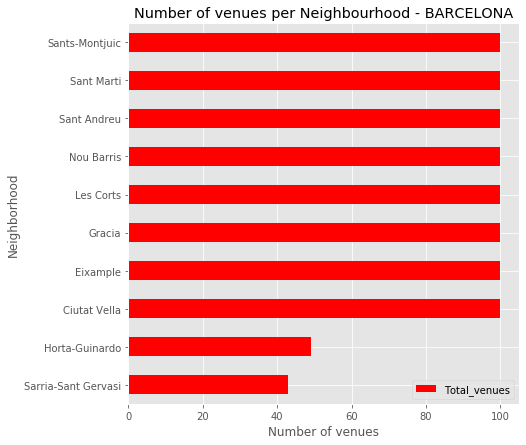

In [49]:
venues_countB1.plot(kind='barh', figsize=(7, 7), color='red')
plt.xlabel('Number of venues')
plt.title('Number of venues per Neighbourhood - BARCELONA')

# annotate value labels to each country
for index, value in enumerate(venues_countB1): 
    label = format(int(value),",")
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy= value, color='white')

plt.show()


In [50]:
print('There are {} uniques categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 184 uniques categories.


#### Analyze each Neighborhood

In [51]:
# one hot encoding
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
barcelona_onehot['Neighborhood'] = barcelona_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

barcelona_onehot.head()

,Winery,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
barcelona_onehot.shape

(892, 184)

In [53]:
barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped

,Neighborhood,Winery,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Track,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Ciutat Vella,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.02,0.01
1,Eixample,0.00,0.00,0.00,0.00,0.010000,0.01,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.01,0.00,0.02,0.00
2,Gracia,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.01,0.02,...,0.00,0.00,0.000000,0.000000,0.02,0.01,0.01,0.00,0.05,0.00
3,Horta-Guinardo,0.00,0.00,0.00,0.00,0.020408,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
4,Les Corts,0.00,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,0.02,...,0.00,0.00,0.000000,0.000000,0.02,0.00,0.00,0.00,0.01,0.02
5,Nou Barris,0.00,0.00,0.00,0.01,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.01,0.000000,0.010000,0.00,0.00,0.00,0.00,0.00,0.00
6,Sant Andreu,0.00,0.02,0.00,0.00,0.000000,0.00,0.00,0.00,0.02,...,0.01,0.01,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00
7,Sant Marti,0.00,0.00,0.01,0.00,0.020000,0.00,0.01,0.00,0.02,...,0.00,0.01,0.000000,0.000000,0.03,0.00,0.00,0.01,0.02,0.00
8,Sants-Montjuic,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.00,0.01,...,0.00,0.00,0.000000,0.000000,0.02,0.00,0.00,0.00,0.03,0.01
9,Sarria-Sant Gervasi,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,...,0.00,0.00,0.023256,0.069767,0.00,0.00,0.00,0.00,0.00,0.00


In [54]:
for hood in barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True))
    print('\n')

----Ciutat Vella----
                   venue  freq
0       Tapas Restaurant  0.11
1                  Hotel  0.07
2           Cocktail Bar  0.06
3            Coffee Shop  0.06
4     Spanish Restaurant  0.05
..                   ...   ...
178    Health Food Store  0.00
179  Hawaiian Restaurant  0.00
180       Hardware Store  0.00
181             Gym Pool  0.00
182   Miscellaneous Shop  0.00

[183 rows x 2 columns]


----Eixample----
                        venue  freq
0                       Hotel  0.12
1            Tapas Restaurant  0.06
2                    Boutique  0.04
3    Mediterranean Restaurant  0.04
4                 Coffee Shop  0.04
..                        ...   ...
178                 Gift Shop  0.00
179    Gluten-free Restaurant  0.00
180                       Gym  0.00
181      Gym / Fitness Center  0.00
182                 Wine Shop  0.00

[183 rows x 2 columns]


----Gracia----
                        venue  freq
0                       Plaza  0.06
1                  

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Tapas Restaurant,Hotel,Cocktail Bar,Coffee Shop,Spanish Restaurant,Bar,Italian Restaurant,Plaza,Ice Cream Shop,Pizza Place
1,Eixample,Hotel,Tapas Restaurant,Mediterranean Restaurant,Boutique,Coffee Shop,Restaurant,Spanish Restaurant,Bookstore,Sandwich Place,Wine Bar
2,Gracia,Plaza,Mediterranean Restaurant,Wine Bar,Tapas Restaurant,Bakery,Cocktail Bar,Restaurant,Indie Movie Theater,Italian Restaurant,Pizza Place
3,Horta-Guinardo,Spanish Restaurant,Tapas Restaurant,Park,Café,Gym,Grocery Store,Plaza,Soccer Field,Mediterranean Restaurant,Sandwich Place
4,Les Corts,Restaurant,Pizza Place,Tapas Restaurant,Spanish Restaurant,Gym / Fitness Center,Mediterranean Restaurant,Hostel,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant


### Cluster Neighborhoods

In [56]:
# set number of clusters
kclusters = 7

barcelona_grouped_clustering = barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 2, 5, 4, 4, 6, 5, 1])

In [57]:
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)
neighborhoods_venues_sorted2 = neighborhoods_venues_sorted
neighborhoods_venues_sorted2.drop(['ClusterLabels'], axis=1, inplace=True)
barcelona_merged = barcelona_df
barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')
barcelona_merged = barcelona_merged.dropna()

In [58]:
barcelona_merged

,Number,Neighborhood,Population,Latitude,Longitude,Area,Density,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Ciutat Vella,103429,41.3750,2.1733,4.11,25159.09,Tapas Restaurant,Hotel,Cocktail Bar,Coffee Shop,Spanish Restaurant,Bar,Italian Restaurant,Plaza,Ice Cream Shop,Pizza Place
1,2,Eixample,265910,41.3937,2.1637,7.46,35625.67,Hotel,Tapas Restaurant,Mediterranean Restaurant,Boutique,Coffee Shop,Restaurant,Spanish Restaurant,Bookstore,Sandwich Place,Wine Bar
2,3,Sants-Montjuic,184091,41.3753,2.1349,22.68,8118.32,Restaurant,Bar,Café,Tapas Restaurant,Bakery,Wine Bar,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant
3,4,Les Corts,81974,41.3852,2.1329,6.02,13607.11,Restaurant,Pizza Place,Tapas Restaurant,Spanish Restaurant,Gym / Fitness Center,Mediterranean Restaurant,Hostel,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant
4,5,Sarria-Sant Gervasi,149260,41.4130,2.1076,19.91,7497.11,Theme Park,Scenic Lookout,Train Station,Theme Park Ride / Attraction,Tapas Restaurant,Museum,Mountain,Ice Cream Shop,Fountain,Park
5,6,Gracia,121798,41.4102,2.1551,4.19,29082.62,Plaza,Mediterranean Restaurant,Wine Bar,Tapas Restaurant,Bakery,Cocktail Bar,Restaurant,Indie Movie Theater,Italian Restaurant,Pizza Place
6,7,Horta-Guinardo,171495,41.4285,2.1436,11.96,14342.64,Spanish Restaurant,Tapas Restaurant,Park,Café,Gym,Grocery Store,Plaza,Soccer Field,Mediterranean Restaurant,Sandwich Place
7,8,Nou Barris,170669,41.4480,2.1788,8.05,21198.48,Spanish Restaurant,Grocery Store,Tapas Restaurant,Supermarket,Pizza Place,Park,Restaurant,Plaza,Metro Station,Bakery
8,9,Sant Andreu,149821,41.4374,2.1969,6.59,22724.25,Spanish Restaurant,Supermarket,Tapas Restaurant,Burger Joint,Clothing Store,Plaza,Park,Coffee Shop,Shopping Mall,Pizza Place
9,10,Sant Marti,238315,41.4068,2.2037,10.39,22943.58,Mediterranean Restaurant,Italian Restaurant,Restaurant,Hotel,Park,Bakery,Spanish Restaurant,Breakfast Spot,Gastropub,Vegetarian / Vegan Restaurant


In [59]:
barcelona_merged = barcelona_merged.dropna()

# Add clustering labels to dataset

neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)
neighborhoods_venues_sorted.drop(neighborhoods_venues_sorted.columns[2:12], axis=1, inplace = True)

In [60]:
# Merge Barcelona_merged with Barcelona data to add latitude/longitude for each neighbourhood

barcelona_merged = barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

barcelona_merged.reset_index(drop=True)

,Number,Neighborhood,Population,Latitude,Longitude,Area,Density,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
0,1,Ciutat Vella,103429,41.3750,2.1733,4.11,25159.09,Tapas Restaurant,Hotel,Cocktail Bar,Coffee Shop,Spanish Restaurant,Bar,Italian Restaurant,Plaza,Ice Cream Shop,Pizza Place,3
1,2,Eixample,265910,41.3937,2.1637,7.46,35625.67,Hotel,Tapas Restaurant,Mediterranean Restaurant,Boutique,Coffee Shop,Restaurant,Spanish Restaurant,Bookstore,Sandwich Place,Wine Bar,3
2,3,Sants-Montjuic,184091,41.3753,2.1349,22.68,8118.32,Restaurant,Bar,Café,Tapas Restaurant,Bakery,Wine Bar,Pizza Place,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,5
3,4,Les Corts,81974,41.3852,2.1329,6.02,13607.11,Restaurant,Pizza Place,Tapas Restaurant,Spanish Restaurant,Gym / Fitness Center,Mediterranean Restaurant,Hostel,Middle Eastern Restaurant,Italian Restaurant,Japanese Restaurant,5
4,5,Sarria-Sant Gervasi,149260,41.4130,2.1076,19.91,7497.11,Theme Park,Scenic Lookout,Train Station,Theme Park Ride / Attraction,Tapas Restaurant,Museum,Mountain,Ice Cream Shop,Fountain,Park,1
5,6,Gracia,121798,41.4102,2.1551,4.19,29082.62,Plaza,Mediterranean Restaurant,Wine Bar,Tapas Restaurant,Bakery,Cocktail Bar,Restaurant,Indie Movie Theater,Italian Restaurant,Pizza Place,0
6,7,Horta-Guinardo,171495,41.4285,2.1436,11.96,14342.64,Spanish Restaurant,Tapas Restaurant,Park,Café,Gym,Grocery Store,Plaza,Soccer Field,Mediterranean Restaurant,Sandwich Place,2
7,8,Nou Barris,170669,41.4480,2.1788,8.05,21198.48,Spanish Restaurant,Grocery Store,Tapas Restaurant,Supermarket,Pizza Place,Park,Restaurant,Plaza,Metro Station,Bakery,4
8,9,Sant Andreu,149821,41.4374,2.1969,6.59,22724.25,Spanish Restaurant,Supermarket,Tapas Restaurant,Burger Joint,Clothing Store,Plaza,Park,Coffee Shop,Shopping Mall,Pizza Place,4
9,10,Sant Marti,238315,41.4068,2.2037,10.39,22943.58,Mediterranean Restaurant,Italian Restaurant,Restaurant,Hotel,Park,Bakery,Spanish Restaurant,Breakfast Spot,Gastropub,Vegetarian / Vegan Restaurant,6


In [61]:
barcelona_map = folium.Map(location=[41.3828939, 2.1774322], zoom_start=11)
barcelona_map.choropleth(
    geo_data=geo_barcelona,
    data=barcelona_merged,
    columns=['Number', 'Population'],
    key_on='feature.properties.cartodb_id',
    fill_color='RdPu', 
    fill_opacity=0.9, 
    legend_name='Population in Barcelona by Neighbourhood',
    reset=True,
    smooth_factor=0
)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ["darkblue","red","green","darkorange","purple","yellow","black"]
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['Latitude'],barcelona_merged['Longitude'],
                                  barcelona_merged['Neighborhood'], barcelona_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color = rainbow[cluster-1],
        fill_opacity=0.7).add_to(barcelona_map)


barcelona_map

C:\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
